# Dimension weighting for silhouette analysis

In [1]:
from utilities.std_imports import *
from ds_topics.utils.clustering import *

### Load data

In [2]:
ds = pd.read_csv(csv_path + 'balance-scale.csv') 
ds.head()

,target,A,B,C,D
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


#### 1. Generate n arrays of candidate weights (n = n_columns)

In [3]:
W = []
W.append(get_candidate_weights(step=0.1))
W.append(get_candidate_weights(step=0.2))
W.append(get_candidate_weights(step=0.5))
W.append(get_candidate_weights(step=0.5))
W  

[array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0.2, 0.4, 0.6, 0.8, 1. ]),
 array([0.5, 1. ]),
 array([0.5, 1. ])]

#### 2. Build weights grid (rows = candidate weights) combinations

In [4]:
cw = get_candidate_weights_grid(candidate_weights=W)
cw[0:5]

array([[0.1, 0.2, 0.5, 0.5],
       [0.1, 0.4, 0.5, 0.5],
       [0.1, 0.6, 0.5, 0.5],
       [0.1, 0.8, 0.5, 0.5],
       [0.1, 1. , 0.5, 0.5]])

#### 3. Calculate weighted_silhouette for each weight candidates

In [5]:
weighted_silhouettes = [weighted_silhouette(ds=ds, label_column='target', weights=cw[i]) for i in range(len(cw))]
weighted_silhouettes[0:5]

[0.07302380448397545,
 0.07853185052112872,
 0.07840902735309921,
 0.07450232321127705,
 0.06958371360484938]

#### 4. Select best combination. Return weights and silhouette_analysis
use weighted columns for regression (in ts, exponential smooth with discount factor)

In [6]:
idx = np.argmax(weighted_silhouettes)
idx, cw[idx], weighted_silhouettes[idx]

(199, array([1., 1., 1., 1.]), 0.08883079139216245)

In [7]:
dsw = weight_features(ds=ds, label_column='target', weights = cw[idx])
dsw.head()

,A,B,C,D,target
0,1.0,1.0,1.0,1.0,B
1,1.0,1.0,1.0,2.0,R
2,1.0,1.0,1.0,3.0,R
3,1.0,1.0,1.0,4.0,R
4,1.0,1.0,1.0,5.0,R


Silhouette score =  0.0888


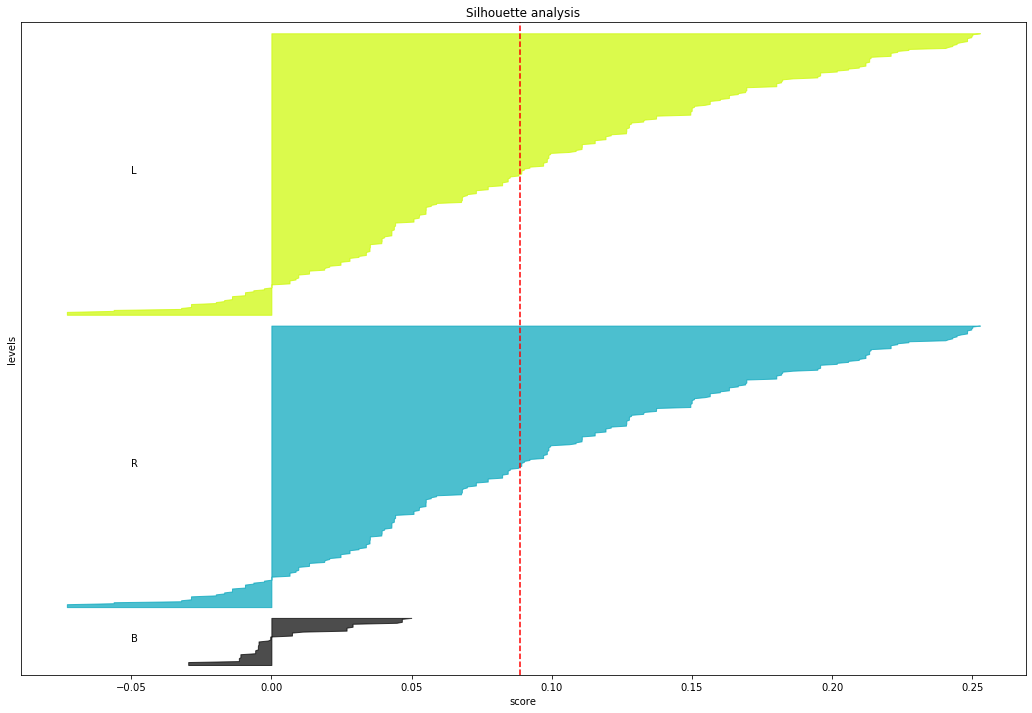

In [8]:
silhouette_analysis(ds=dsw, label_column='target')

### For time series

In [9]:
data = pd.read_csv(csv_path + '/toy/regression_tsClass_toy.csv') 
ds = data[['t1', 't2', 't3', 't4', 't5', 'fcst1']]
ds.head()

,t1,t2,t3,t4,t5,fcst1
0,1,2,3,4,5,6
1,2,4,5,6,8,10
2,1,2,1,2,1,2
3,7,6,5,4,3,2
4,9,8,7,6,5,4


Silhouette score =  -0.1371


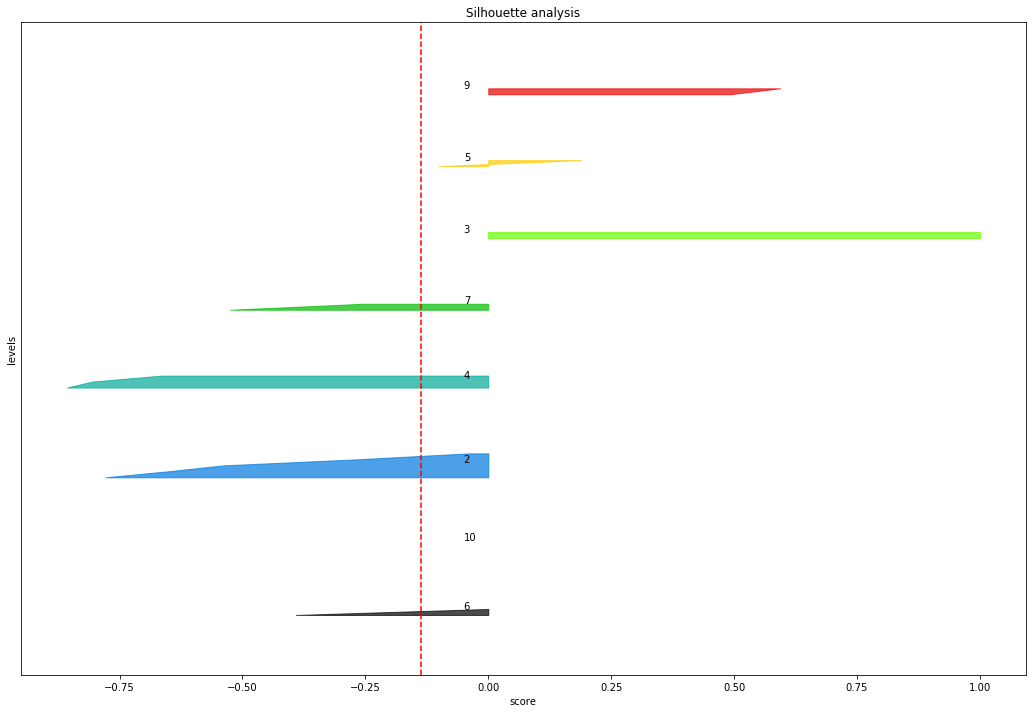

In [10]:
silhouette_analysis(ds=ds, label_column='fcst1')

In [59]:
ew = get_exponential_weights(n=5, disc_factor=0.27)
ew

[0.28, 0.39, 0.53, 0.73, 1]

In [60]:
dsw = weight_features(ds=ds, label_column='fcst1', weights = ew)
dsw.head()

,t1,t2,t3,t4,t5,fcst1
0,0.28,0.78,1.59,2.92,5.0,6
1,0.56,1.56,2.65,4.38,8.0,10
2,0.28,0.78,0.53,1.46,1.0,2
3,1.96,2.34,2.65,2.92,3.0,2
4,2.52,3.12,3.71,4.38,5.0,4


Silhouette score =  -0.0929


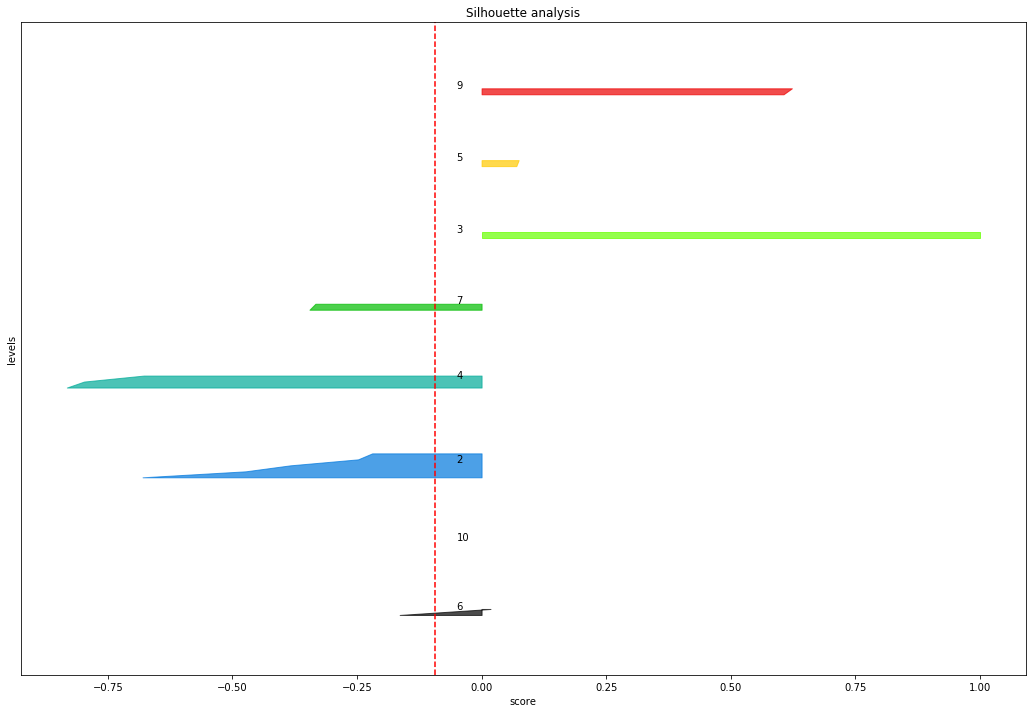

In [61]:
silhouette_analysis(ds=dsw, label_column='fcst1')

### For classifying trend

In [62]:
ds = data[['t1', 't2', 't3', 't4', 't5', 'trend']]
ds.head()

,t1,t2,t3,t4,t5,trend
0,1,2,3,4,5,1
1,2,4,5,6,8,1
2,1,2,1,2,1,0
3,7,6,5,4,3,-1
4,9,8,7,6,5,-1


Silhouette score =  0.0565


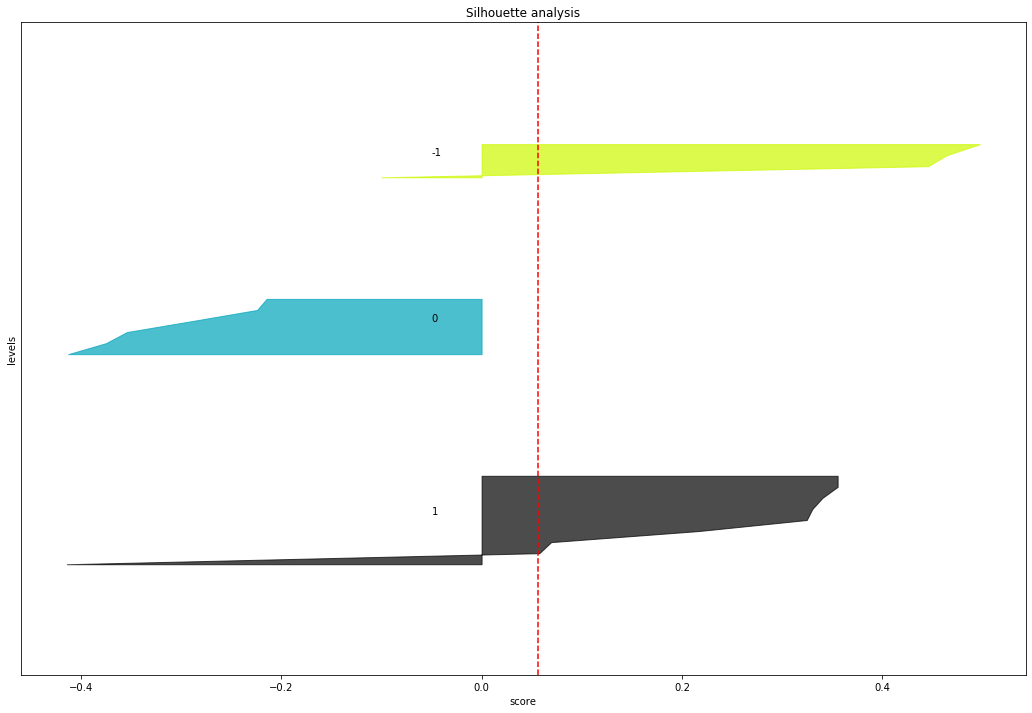

In [63]:
silhouette_analysis(ds=ds, label_column='trend')

Silhouette score =  0.0544


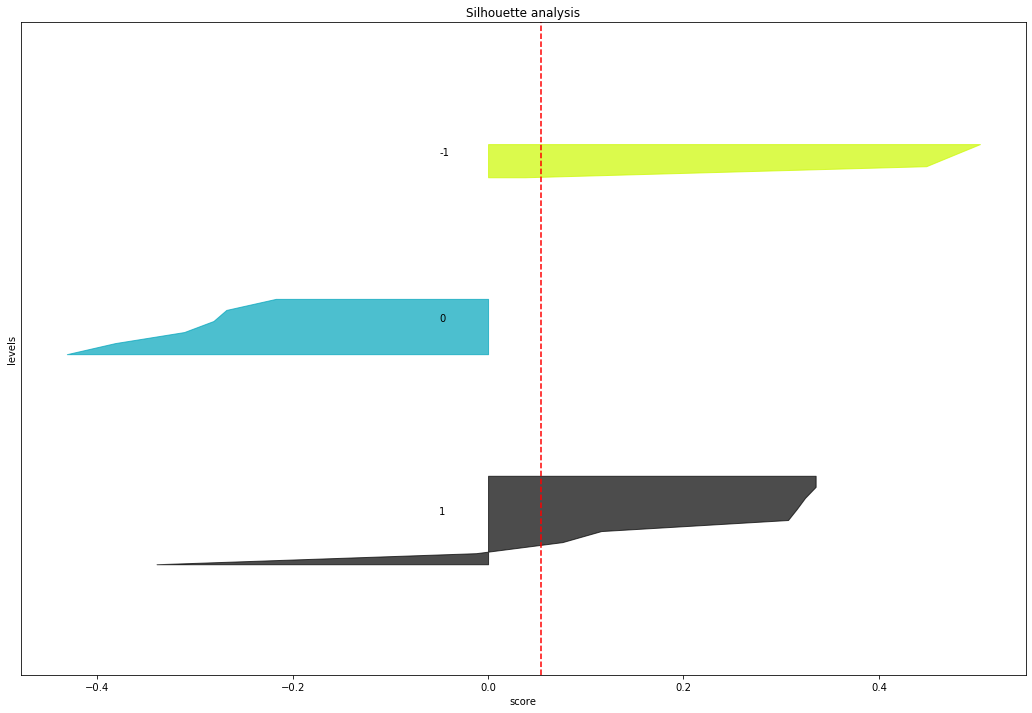

In [72]:
ew = get_exponential_weights(n=5, disc_factor=0.1)
dsw = weight_features(ds=ds, label_column='trend', weights = ew)
silhouette_analysis(ds=dsw, label_column='trend')